# 지역 특징점 검출과 매칭

### 코너 컴출

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

### 해리스 코너 검출

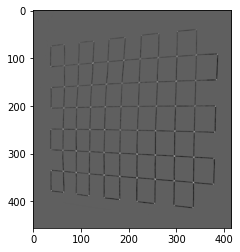

In [2]:
src = cv2.imread('./data/skewed_chessboard.jpg')
if src is None:
    print('image load failed')
    sys.exit()
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
harris = cv2.cornerHarris(gray, 2, 3, 0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
plt.imshow(harris_norm, cmap='gray')

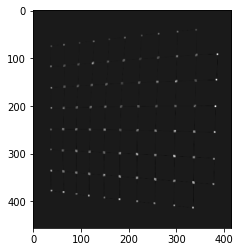

In [3]:
harris_dilate = cv2.dilate(harris, None)
plt.imshow(harris_dilate, cmap='gray')

In [4]:
harris.shape

(456, 416)

In [5]:
gray.shape

(456, 416)

In [6]:
thresh = 0.1 * harris.max()
dst = np.copy(src)
for y in range(harris.shape[0]):
    for x in range(harris.shape[1]):
        if harris[y, x] > thresh:
            cv2.circle(dst, (x,y), 1, (0, 0, 255), 1)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

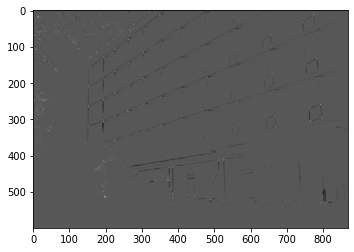

In [7]:
src = cv2.imread('./data/building.jpg')
if src is None:
    print('image load failed')
    sys.exit()
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
harris = cv2.cornerHarris(gray, 3, 3, 0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
plt.imshow(harris_norm, cmap='gray')

In [8]:
thresh = 0.05 * harris.max()
dst = np.copy(src)
for y in range(harris.shape[0]):
    for x in range(harris.shape[1]):
        if harris[y, x] > thresh:
            if harris[y, x] > harris[y-1, x] and \
                harris[y, x] > harris[y+1, x] and \
                harris[y, x] > harris[y, x-1] and \
                harris[y, x] > harris[y, x+1]:
                cv2.circle(dst, (x,y), 5, (0, 0, 255), 1)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

time to detect - Harris Corner : 2.039 ms.


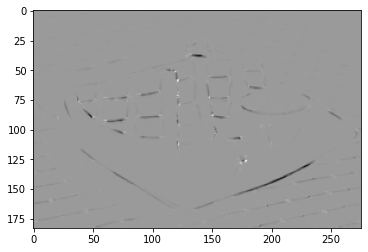

In [9]:
src = cv2.imread('./data/waffle.jpg')
if src is None:
    print('image load failed')
    sys.exit()
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
tm = cv2.TickMeter()
tm.start()
# gray = np.float32(gray)
harris = cv2.cornerHarris(gray, 2, 3, 0.04)
tm.stop()
print('time to detect - Harris Corner : %4.3f ms.' % (tm.getTimeMilli()))

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
plt.imshow(harris_norm, cmap='gray')

In [10]:
thresh = 0.1 * harris.max()
dst = np.copy(src)
for y in range(harris.shape[0]):
    for x in range(harris.shape[1]):
        if harris[y, x] > thresh:
            cv2.circle(dst, (x,y), 2, (0, 0, 255), 1)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

### FAST 코너 검출

time to detect - Fast Corner : 0.498 ms.


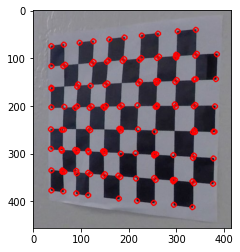

In [11]:
src = cv2.imread('./data/skewed_chessboard.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

tm = cv2.TickMeter()
tm.start()
fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=True)
#fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=False)
keypoints = fast.detect(gray)
tm.stop()
print("time to detect - Fast Corner : %4.3f ms."%tm.getTimeMilli())

dst = np.copy(src)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

for keypoint in keypoints:
    pt = int(keypoint.pt[0]), int(keypoint.pt[1])
    cv2.circle(dst, pt, 5, (255, 0, 0), 2)

plt.imshow(dst)

time to detect - Fast Corner : 0.371 ms.


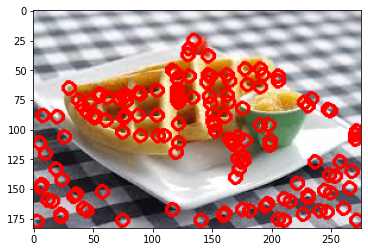

In [12]:
src = cv2.imread('./data/waffle.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

tm = cv2.TickMeter()
tm.start()
fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=True)
#fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=False)
keypoints = fast.detect(gray)
tm.stop()
print("time to detect - Fast Corner : %4.3f ms."%tm.getTimeMilli())

dst = np.copy(src)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

for keypoint in keypoints:
    pt = int(keypoint.pt[0]), int(keypoint.pt[1])
    cv2.circle(dst, pt, 5, (255, 0, 0), 2)

plt.imshow(dst)

time to detect - Fast Corner : 0.928 ms.


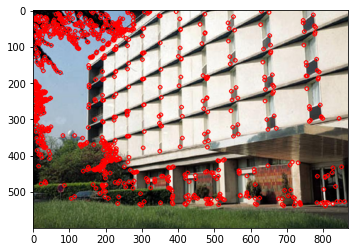

In [13]:
src = cv2.imread('./data/building.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

tm = cv2.TickMeter()
tm.start()
fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=True)
#fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=False)
keypoints = fast.detect(gray)
tm.stop()
print("time to detect - Fast Corner : %4.3f ms."%tm.getTimeMilli())

dst = np.copy(src)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

for keypoint in keypoints:
    pt = int(keypoint.pt[0]), int(keypoint.pt[1])
    cv2.circle(dst, pt, 5, (255, 0, 0), 2)

plt.imshow(dst)